# Importing Libraries

In [21]:
# ignore warning
import warnings
warnings.filterwarnings('ignore')

# data manipulation
import numpy as np
import pandas as pd

# data visulization
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

# Basic Operations

In [2]:
df = pd.read_csv("dataset/ant-1.7.csv")
df.head()

,name,version,name.1,wmc,dit,noc,cbo,rfc,lcom,ca,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,ant,1.7,org.apache.tools.ant.AntClassLoader,56,2,2,51,169,1200,37,...,0.875000,2,0.409639,0.155844,1,5,31.607143,14,2.1964,6
1,ant,1.7,org.apache.tools.ant.AntTypeDefinition,21,1,2,14,47,124,10,...,0.857143,0,0.000000,0.325397,0,0,26.047619,10,2.6190,0
2,ant,1.7,org.apache.tools.ant.BuildEvent,11,2,0,17,15,13,15,...,1.000000,3,0.200000,0.220779,0,0,7.272727,1,0.7273,0
3,ant,1.7,org.apache.tools.ant.BuildException,15,4,3,499,30,0,498,...,1.000000,1,0.619048,0.322222,1,3,9.066667,2,0.6667,0
4,ant,1.7,org.apache.tools.ant.BuildListener,7,1,0,16,7,21,15,...,0.000000,0,0.000000,1.000000,0,0,0.000000,1,1.0000,1


In [3]:
df = df.drop(columns=['name', 'version', 'name.1'])

In [5]:
df.shape

(745, 21)

In [11]:
df.drop_duplicates()
df.shape

(745, 21)

# Data Pre Processing

In [6]:
# Null Values Filling

for col in df.columns:
    # Convert to numeric with coerce, setting non-numeric values to NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

    # Calculate the mode of the numerical values
    mode_value = df[col].mode()[0]

    # Replace NaN values with the mode value
    df[col].fillna(mode_value, inplace=True)

In [7]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df.loc[df['bug'] >= 1, 'bug'] = 1


df['bug'] = le.fit_transform(df['bug'])

df.head()

# True = 0
# False = 1

"""
false = 0
true = 1
"""

'\nfalse = 0\ntrue = 1\n'

In [11]:
df

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,56,2,2,51,169,1200,37,16,35,0.848864,...,0.875000,2,0.409639,0.155844,1,5,31.607143,14,2.1964,1
1,21,1,2,14,47,124,10,4,18,0.700000,...,0.857143,0,0.000000,0.325397,0,0,26.047619,10,2.6190,0
2,11,2,0,17,15,13,15,3,11,0.750000,...,1.000000,3,0.200000,0.220779,0,0,7.272727,1,0.7273,0
3,15,4,3,499,30,0,498,1,15,0.392857,...,1.000000,1,0.619048,0.322222,1,3,9.066667,2,0.6667,0
4,7,1,0,16,7,21,15,1,7,2.000000,...,0.000000,0,0.000000,1.000000,0,0,0.000000,1,1.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,6,1,0,8,6,15,7,1,6,2.000000,...,0.000000,0,0.000000,0.444444,0,0,0.000000,1,1.0000,0
741,17,1,0,13,73,82,8,6,10,0.820312,...,1.000000,0,0.000000,0.183824,0,0,33.705882,3,0.9412,1
742,10,1,0,3,11,15,3,0,10,0.333333,...,1.000000,0,0.000000,0.320000,1,1,14.300000,4,1.0000,1
743,27,3,0,8,101,157,5,3,15,0.824786,...,0.888889,1,0.294118,0.183761,1,7,45.629630,4,1.1111,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   wmc     745 non-null    int64  
 1   dit     745 non-null    int64  
 2   noc     745 non-null    int64  
 3   cbo     745 non-null    int64  
 4   rfc     745 non-null    int64  
 5   lcom    745 non-null    int64  
 6   ca      745 non-null    int64  
 7   ce      745 non-null    int64  
 8   npm     745 non-null    int64  
 9   lcom3   745 non-null    float64
 10  loc     745 non-null    int64  
 11  dam     745 non-null    float64
 12  moa     745 non-null    int64  
 13  mfa     745 non-null    float64
 14  cam     745 non-null    float64
 15  ic      745 non-null    int64  
 16  cbm     745 non-null    int64  
 17  amc     745 non-null    float64
 18  max_cc  745 non-null    int64  
 19  avg_cc  745 non-null    float64
 20  bug     745 non-null    int64  
dtypes: float64(6), int64(15)
memory usage: 

In [12]:
X = df.iloc[:, :-1]
y = df['bug']

In [13]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Checking Data is Balanced or Not

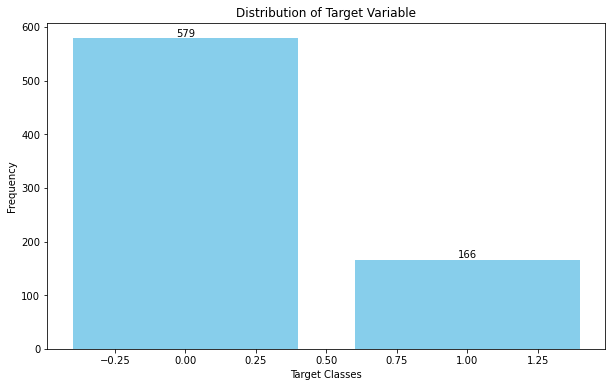

In [14]:
target_counts = df['bug'].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(target_counts.index, target_counts.values, color='skyblue')

plt.title('Distribution of Target Variable')
plt.xlabel('Target Classes')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

# Add numbers on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.show()

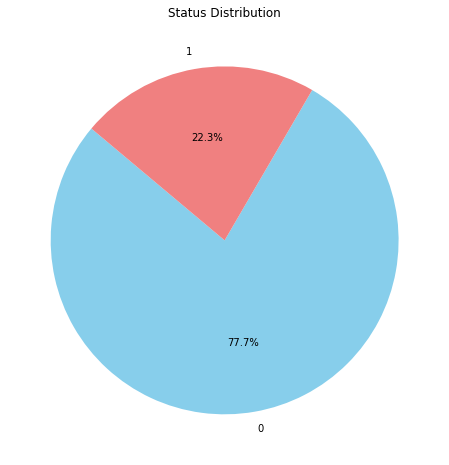

In [16]:
status_counts = y.value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Status Distribution')
plt.show()

# Modeling with Imbalanced Data

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

# Logistic Regression
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
accuracy11 = accuracy_score(y_test, y_pred)
precision11 = accuracy_score(y_test, y_pred)
recall11 = accuracy_score(y_test, y_pred)
f1score11 = accuracy_score(y_test, y_pred)
print(f'{model1} Accuracy: {accuracy11 * 100:.2f}%')
print(f'{model1} Precision: {precision11 * 100:.2f}%')
print(f'{model1} Recall: {recall11 * 100:.2f}%')
print(f'{model1} F1 Score: {f1score11 * 100:.2f}%')
cr11 = classification_report(y_test, y_pred)
print(cr11)


# K-Nearest Neighbors
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
accuracy21 = accuracy_score(y_test, y_pred)
precision21 = accuracy_score(y_test, y_pred)
recall21 = accuracy_score(y_test, y_pred)
f1score21 = accuracy_score(y_test, y_pred)
print(f'{model2} Accuracy: {accuracy21 * 100:.2f}%')
print(f'{model2} Precision: {precision21 * 100:.2f}%')
print(f'{model2} Recall: {recall21 * 100:.2f}%')
print(f'{model2} F1 Score: {f1score21 * 100:.2f}%')
cr11 = classification_report(y_test, y_pred)
print(cr11)

# Deision Tree
model3 = DecisionTreeClassifier()
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
accuracy31 = accuracy_score(y_test, y_pred)
precision31 = accuracy_score(y_test, y_pred)
recall31 = accuracy_score(y_test, y_pred)
f1score31 = accuracy_score(y_test, y_pred)
print(f'{model3} Accuracy: {accuracy31 * 100:.2f}%')
print(f'{model3} Precision: {precision31 * 100:.2f}%')
print(f'{model3} Recall: {recall31 * 100:.2f}%')
print(f'{model3} F1 Score: {f1score31 * 100:.2f}%')
cr11 = classification_report(y_test, y_pred)
print(cr11)

# Random Forest
model4 = RandomForestClassifier()
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)
accuracy41 = accuracy_score(y_test, y_pred)
print(f'{model4} Accuracy: {accuracy41 * 100:.2f}%')
cr11 = classification_report(y_test, y_pred)
print(cr11)

# SVM
model5 = SVC(kernel='linear')
model5.fit(X_train, y_train)
y_pred = model5.predict(X_test)
accuracy51 = accuracy_score(y_test, y_pred)
print(f'{model5} Accuracy: {accuracy51 * 100:.2f}%')
cr11 = classification_report(y_test, y_pred)
print(cr11)

# Ensemble Model
ensemble_model = VotingClassifier(estimators=[
    ('log_reg', model1),
    # ('dtree', model3),
    ('Random Forest', model4),
    # ('SVM', model5),
    ('KNN', model2)
], voting='soft') 
ensemble_model.fit(X_train, y_train)
y_pred = ensemble_model.predict(X_test)
accuracy61 = accuracy_score(y_test, y_pred)
print(f'Ensemble Model Accuracy: {accuracy61 * 100:.2f}%')
cr11 = classification_report(y_test, y_pred)
print(cr11)

LogisticRegression() Accuracy: 87.25%
LogisticRegression() Precision: 87.25%
LogisticRegression() Recall: 87.25%
LogisticRegression() F1 Score: 87.25%
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       117
           1       0.93      0.44      0.60        32

    accuracy                           0.87       149
   macro avg       0.90      0.71      0.76       149
weighted avg       0.88      0.87      0.85       149

KNeighborsClassifier() Accuracy: 82.55%
KNeighborsClassifier() Precision: 82.55%
KNeighborsClassifier() Recall: 82.55%
KNeighborsClassifier() F1 Score: 82.55%
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       117
           1       0.67      0.38      0.48        32

    accuracy                           0.83       149
   macro avg       0.76      0.66      0.69       149
weighted avg       0.81      0.83      0.81       149

DecisionTreeClassifier() Accuracy: 7

In [25]:
from sklearn.ensemble import StackingClassifier


ensemble_sc = StackingClassifier(estimators=[
    ('dtree', model3),
    ('Random Forest', model4),
    ('KNN', model2)
]) 
ensemble_sc.fit(X_train, y_train)
y_pred = ensemble_sc.predict(X_test)
accuracy75 = accuracy_score(y_test, y_pred)
print(f'Ensemble Model Accuracy: {accuracy75 * 100:.2f}%')
cr11 = classification_report(y_test, y_pred)
print(cr11)

Ensemble Model Accuracy: 85.91%
              precision    recall  f1-score   support

           0       0.86      0.97      0.92       117
           1       0.82      0.44      0.57        32

    accuracy                           0.86       149
   macro avg       0.84      0.71      0.74       149
weighted avg       0.86      0.86      0.84       149



In [ ]:
model2 = KNeighborsClassifier()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
accuracy21 = accuracy_score(y_test, y_pred)
print(f'{model2} Accuracy: {accuracy21 * 100:.2f}%')

# Solving Imabalanced Data

## 1- Random Under Sampling

In [26]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X,y)

X1 = X_resampled
y1 = y_resampled

# Converting numpy to pandas
X_names = df.columns[:20]
X1 = pd.DataFrame(X1, columns=X_names)
y1 = pd.DataFrame(y1, columns=['bug'])

df1 = pd.concat([X1, y1], axis=1)
df1.head()

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,-0.173058,2.487859,-0.152496,0.036201,-0.176730,-0.237767,-0.064156,0.398927,-0.468105,-1.436054,...,0.811122,-0.509373,1.112264,-0.715271,4.560498,7.158725,-0.115203,-0.106781,0.215114,0
1,-0.340171,-1.088859,-0.152496,0.492034,-0.732273,-0.246345,0.711131,-1.017157,-0.146391,-0.560420,...,0.811122,-0.509373,-1.279950,0.922404,-0.768189,-0.563162,-0.246009,-0.585049,-0.577603,0
2,-0.674398,1.772516,-0.152496,-0.153729,-0.565610,-0.246345,0.013372,-0.663136,-0.575343,1.594986,...,-1.472798,-0.509373,1.151480,0.311331,0.297548,-0.134169,-0.094984,-0.266204,0.341199,0
3,-0.590841,-0.373515,-0.152496,-0.267687,-0.593387,-0.254924,-0.180449,-0.486126,-0.468105,-1.099272,...,0.811122,-0.509373,0.602448,0.097456,-0.768189,-0.563162,-0.050574,-0.585049,-0.699149,0
4,-0.674398,0.341829,-0.152496,-0.305673,-0.815605,-0.252065,-0.219214,-0.486126,-0.682581,-0.829846,...,0.811122,-0.509373,1.163865,2.022335,-0.768189,-0.563162,-0.263959,-0.585049,-1.172055,0


bug
0      166
1      166
Name: count, dtype: int64


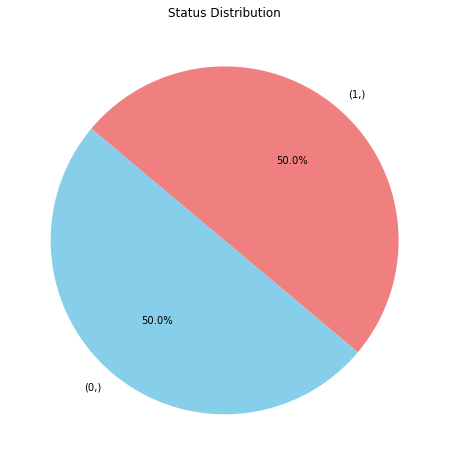

In [21]:
# Distribution after Random Under Sampling
status_counts = y1.value_counts()
print(status_counts)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Status Distribution')
plt.show()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.2, random_state=0)

# Logistic Regression
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
accuracy12 = accuracy_score(y_test, y_pred)
print(f'{model1} Accuracy: {accuracy12 * 100:.2f}%')
cr11 = classification_report(y_test, y_pred)
print(cr11)

# K-Nearest Neighbors
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
accuracy22 = accuracy_score(y_test, y_pred)
print(f'{model2} Accuracy: {accuracy22 * 100:.2f}%')
cr11 = classification_report(y_test, y_pred)
print(cr11)

# Deision Tree
model3 = DecisionTreeClassifier()
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
accuracy32 = accuracy_score(y_test, y_pred)
print(f'{model3} Accuracy: {accuracy32 * 100:.2f}%')
cr11 = classification_report(y_test, y_pred)
print(cr11)

# Random Forest
model4 = RandomForestClassifier()
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)
accuracy42 = accuracy_score(y_test, y_pred)
print(f'{model4} Accuracy: {accuracy42 * 100:.2f}%')
cr11 = classification_report(y_test, y_pred)
print(cr11)

# SVM
model5 = SVC(kernel='linear')
model5.fit(X_train, y_train)
y_pred = model5.predict(X_test)
accuracy52 = accuracy_score(y_test, y_pred)
print(f'{model5} Accuracy: {accuracy52 * 100:.2f}%')
cr11 = classification_report(y_test, y_pred)
print(cr11)

# Ensemble Model
ensemble_model = VotingClassifier(estimators=[
    ('log_reg', model1),
    ('Random Forest', model4),
    ('KNN', model2)
], voting='soft') 
ensemble_model.fit(X_train, y_train)
y_pred = ensemble_model.predict(X_test)
accuracy62 = accuracy_score(y_test, y_pred)
print(f'Ensemble Model Accuracy: {accuracy62 * 100:.2f}%')
cr11 = classification_report(y_test, y_pred)
print(cr11)

LogisticRegression() Accuracy: 76.12%
KNeighborsClassifier() Accuracy: 67.16%
DecisionTreeClassifier() Accuracy: 62.69%
RandomForestClassifier() Accuracy: 73.13%
SVC(kernel='linear') Accuracy: 73.13%
Ensemble Model Accuracy: 74.63%


## 2- Random Over Sampling

In [19]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
X2 = X_resampled
y2 = y_resampled

# Converting numpy to pandas
X_names = df.columns[:20]
X2 = pd.DataFrame(X2, columns=X_names)
y2 = pd.DataFrame(y2, columns=['bug'])

df2 = pd.concat([X2, y2], axis=1)
df2.head()

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,3.754107,-0.373515,0.264420,1.517657,3.739851,3.176563,1.215068,1.815011,2.856273,-0.265889,...,0.525632,0.893522,-0.251813,-1.227462,0.297548,1.581807,0.103546,1.487444,0.942348,1
1,0.829623,-1.088859,0.264420,0.112174,0.351036,0.099663,0.168430,-0.309115,1.033227,-0.506535,...,0.484848,-0.509373,-1.279950,-0.574725,-0.768189,-0.563162,0.031283,0.849754,1.421950,0
2,-0.005944,-0.373515,-0.152496,0.226132,-0.537833,-0.217750,0.362252,-0.486126,0.282561,-0.425707,...,0.811122,1.594969,-0.777977,-0.977477,-0.768189,-0.563162,-0.212755,-0.585049,-0.724911,0
3,0.328282,1.057172,0.472877,18.535401,-0.121176,-0.254924,19.085437,-0.840147,0.711513,-1.003048,...,0.811122,0.192074,0.273775,-0.586946,0.297548,0.723819,-0.189437,-0.425626,-0.793685,0
4,-0.340171,-1.088859,-0.152496,0.188146,-0.760051,-0.194873,0.362252,-0.840147,-0.146391,1.594986,...,-1.472798,-0.509373,-1.279950,2.022335,-0.768189,-0.563162,-0.307286,-0.585049,-0.415428,1


bug
0      579
1      579
Name: count, dtype: int64


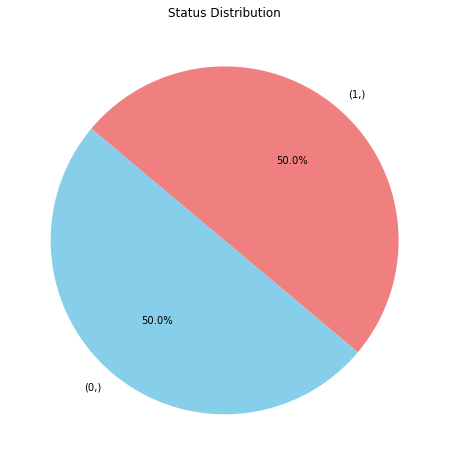

In [21]:
# Distribution after Random Over Sampling
status_counts = y2.value_counts()
print(status_counts)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Status Distribution')
plt.show()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X2,y2,test_size=0.2, random_state=0)

# Logistic Regression
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
accuracy13 = accuracy_score(y_test, y_pred)
print(f'{model1} Accuracy: {accuracy13 * 100:.2f}%')
cr11 = classification_report(y_test, y_pred)
print(cr11)

# K-Nearest Neighbors
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
accuracy23 = accuracy_score(y_test, y_pred)
print(f'{model2} Accuracy: {accuracy23 * 100:.2f}%')
cr11 = classification_report(y_test, y_pred)
print(cr11)

# Deision Tree
model3 = DecisionTreeClassifier()
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
accuracy33 = accuracy_score(y_test, y_pred)
print(f'{model3} Accuracy: {accuracy33 * 100:.2f}%')
cr11 = classification_report(y_test, y_pred)
print(cr11)

# Random Forest
model4 = RandomForestClassifier()
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)
accuracy43 = accuracy_score(y_test, y_pred)
print(f'{model4} Accuracy: {accuracy43 * 100:.2f}%')
cr11 = classification_report(y_test, y_pred)
print(cr11)

# SVM
model5 = SVC(kernel='linear')
model5.fit(X_train, y_train)
y_pred = model5.predict(X_test)
accuracy53 = accuracy_score(y_test, y_pred)
print(f'{model5} Accuracy: {accuracy53 * 100:.2f}%')
cr11 = classification_report(y_test, y_pred)
print(cr11)

# Ensemble Model
ensemble_model = VotingClassifier(estimators=[
    ('dtree', model3),
    ('Random Forest', model4),
    ('KNN', model2)
], voting='soft') 
ensemble_model.fit(X_train, y_train)
y_pred = ensemble_model.predict(X_test)
accuracy63 = accuracy_score(y_test, y_pred)
print(f'Ensemble Model Accuracy: {accuracy63 * 100:.2f}%')
cr11 = classification_report(y_test, y_pred)
print(cr11)

LogisticRegression() Accuracy: 74.14%
KNeighborsClassifier() Accuracy: 84.05%
DecisionTreeClassifier() Accuracy: 91.38%
RandomForestClassifier() Accuracy: 93.53%
SVC(kernel='linear') Accuracy: 75.43%
Ensemble Model Accuracy: 94.83%


## 3- SMOTE

In [27]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X,y)
X3 = X_resampled
y3 = y_resampled

# Converting numpy to pandas
X_names = df.columns[:20]
X3 = pd.DataFrame(X3, columns=X_names)
y3 = pd.DataFrame(y3, columns=['bug'])

df3 = pd.concat([X3, y3], axis=1)
df3.head()

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,3.754107,-0.373515,0.264420,1.517657,3.739851,3.176563,1.215068,1.815011,2.856273,-0.265889,...,0.525632,0.893522,-0.251813,-1.227462,0.297548,1.581807,0.103546,1.487444,0.942348,1
1,0.829623,-1.088859,0.264420,0.112174,0.351036,0.099663,0.168430,-0.309115,1.033227,-0.506535,...,0.484848,-0.509373,-1.279950,-0.574725,-0.768189,-0.563162,0.031283,0.849754,1.421950,0
2,-0.005944,-0.373515,-0.152496,0.226132,-0.537833,-0.217750,0.362252,-0.486126,0.282561,-0.425707,...,0.811122,1.594969,-0.777977,-0.977477,-0.768189,-0.563162,-0.212755,-0.585049,-0.724911,0
3,0.328282,1.057172,0.472877,18.535401,-0.121176,-0.254924,19.085437,-0.840147,0.711513,-1.003048,...,0.811122,0.192074,0.273775,-0.586946,0.297548,0.723819,-0.189437,-0.425626,-0.793685,0
4,-0.340171,-1.088859,-0.152496,0.188146,-0.760051,-0.194873,0.362252,-0.840147,-0.146391,1.594986,...,-1.472798,-0.509373,-1.279950,2.022335,-0.768189,-0.563162,-0.307286,-0.585049,-0.415428,1


bug
0      579
1      579
Name: count, dtype: int64


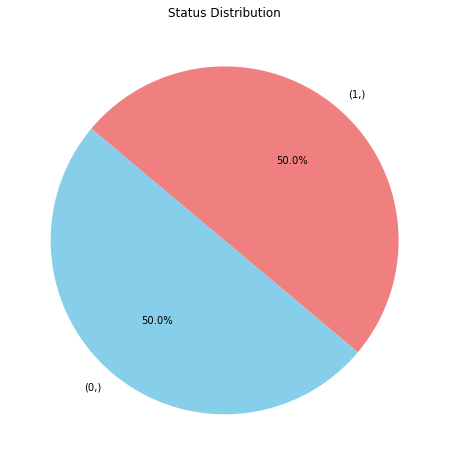

In [28]:
# Distribution after Random Under Sampling
status_counts = y3.value_counts()
print(status_counts)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Status Distribution')
plt.show()

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X3,y3,test_size=0.2, random_state=0)

# Logistic Regression
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
accuracy14 = accuracy_score(y_test, y_pred)
print(f'{model1} Accuracy: {accuracy14 * 100:.2f}%')
cr11 = classification_report(y_test, y_pred)
print(cr11)

# K-Nearest Neighbors
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
accuracy24 = accuracy_score(y_test, y_pred)
print(f'{model2} Accuracy: {accuracy24 * 100:.2f}%')
cr11 = classification_report(y_test, y_pred)
print(cr11)

# Deision Tree
model3 = DecisionTreeClassifier()
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
accuracy34 = accuracy_score(y_test, y_pred)
print(f'{model3} Accuracy: {accuracy34 * 100:.2f}%')
cr11 = classification_report(y_test, y_pred)
print(cr11)

# Random Forest
model4 = RandomForestClassifier()
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)
accuracy44 = accuracy_score(y_test, y_pred)
print(f'{model4} Accuracy: {accuracy44 * 100:.2f}%')
cr11 = classification_report(y_test, y_pred)
print(cr11)

# SVM
model5 = SVC(kernel='linear')
model5.fit(X_train, y_train)
y_pred = model5.predict(X_test)
accuracy54 = accuracy_score(y_test, y_pred)
print(f'{model5} Accuracy: {accuracy54 * 100:.2f}%')
cr11 = classification_report(y_test, y_pred)
print(cr11)

# Ensemble Model
ensemble_model = VotingClassifier(estimators=[
    ('dtree', model3),
    ('Random Forest', model4),
    ('KNN', model2)
], voting='soft') 
ensemble_model.fit(X_train, y_train)
y_pred = ensemble_model.predict(X_test)
accuracy64 = accuracy_score(y_test, y_pred)
print(f'Ensemble Model Accuracy: {accuracy64 * 100:.2f}%')
cr11 = classification_report(y_test, y_pred)
print(cr11)

LogisticRegression() Accuracy: 76.29%
              precision    recall  f1-score   support

           0       0.71      0.85      0.77       110
           1       0.83      0.69      0.75       122

    accuracy                           0.76       232
   macro avg       0.77      0.77      0.76       232
weighted avg       0.77      0.76      0.76       232

KNeighborsClassifier() Accuracy: 87.50%
              precision    recall  f1-score   support

           0       0.99      0.75      0.85       110
           1       0.81      0.99      0.89       122

    accuracy                           0.88       232
   macro avg       0.90      0.87      0.87       232
weighted avg       0.90      0.88      0.87       232

DecisionTreeClassifier() Accuracy: 83.62%
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       110
           1       0.86      0.82      0.84       122

    accuracy                           0.84       232
   macro

In [31]:
from sklearn.ensemble import StackingClassifier


ensemble_sc = StackingClassifier(estimators=[
    ('dtree', model3),
    ('Random Forest', model4),
    ('KNN', model2)
]) 
ensemble_sc.fit(X_train, y_train)
y_pred = ensemble_sc.predict(X_test)
accuracy74 = accuracy_score(y_test, y_pred)
print(f'Ensemble Model Accuracy: {accuracy74 * 100:.2f}%')
cr11 = classification_report(y_test, y_pred)
print(cr11)

Ensemble Model Accuracy: 89.66%
              precision    recall  f1-score   support

           0       0.91      0.86      0.89       110
           1       0.88      0.93      0.90       122

    accuracy                           0.90       232
   macro avg       0.90      0.89      0.90       232
weighted avg       0.90      0.90      0.90       232



## 4- ADASYN

In [32]:
from imblearn.over_sampling import ADASYN
smote = ADASYN(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X,y)
X4 = X_resampled
y4 = y_resampled

# Converting numpy to pandas
X_names = df.columns[:20]
X4 = pd.DataFrame(X4, columns=X_names)
y4 = pd.DataFrame(y4, columns=['bug'])

df4 = pd.concat([X4, y4], axis=1)
df4.head()

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,3.754107,-0.373515,0.264420,1.517657,3.739851,3.176563,1.215068,1.815011,2.856273,-0.265889,...,0.525632,0.893522,-0.251813,-1.227462,0.297548,1.581807,0.103546,1.487444,0.942348,1
1,0.829623,-1.088859,0.264420,0.112174,0.351036,0.099663,0.168430,-0.309115,1.033227,-0.506535,...,0.484848,-0.509373,-1.279950,-0.574725,-0.768189,-0.563162,0.031283,0.849754,1.421950,0
2,-0.005944,-0.373515,-0.152496,0.226132,-0.537833,-0.217750,0.362252,-0.486126,0.282561,-0.425707,...,0.811122,1.594969,-0.777977,-0.977477,-0.768189,-0.563162,-0.212755,-0.585049,-0.724911,0
3,0.328282,1.057172,0.472877,18.535401,-0.121176,-0.254924,19.085437,-0.840147,0.711513,-1.003048,...,0.811122,0.192074,0.273775,-0.586946,0.297548,0.723819,-0.189437,-0.425626,-0.793685,0
4,-0.340171,-1.088859,-0.152496,0.188146,-0.760051,-0.194873,0.362252,-0.840147,-0.146391,1.594986,...,-1.472798,-0.509373,-1.279950,2.022335,-0.768189,-0.563162,-0.307286,-0.585049,-0.415428,1


bug
1      587
0      579
Name: count, dtype: int64


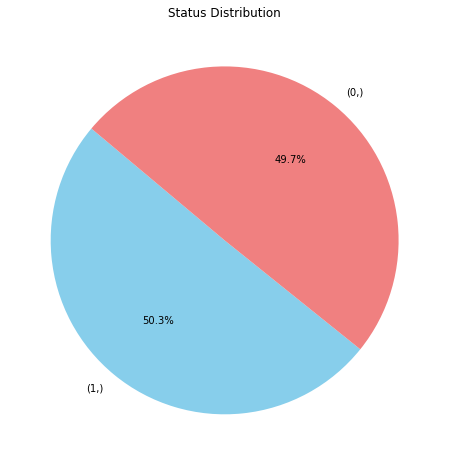

In [35]:
# Distribution after Random Under Sampling
status_counts = y4.value_counts()
print(status_counts)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Status Distribution')
plt.show()

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X4,y4,test_size=0.2, random_state=0)

# Logistic Regression
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
accuracy15 = accuracy_score(y_test, y_pred)
print(f'{model1} Accuracy: {accuracy15 * 100:.2f}%')
cr11 = classification_report(y_test, y_pred)
print(cr11)

# K-Nearest Neighbors
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
accuracy25 = accuracy_score(y_test, y_pred)
print(f'{model2} Accuracy: {accuracy25 * 100:.2f}%')
cr11 = classification_report(y_test, y_pred)
print(cr11)

# Deision Tree
model3 = DecisionTreeClassifier()
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
accuracy35 = accuracy_score(y_test, y_pred)
print(f'{model3} Accuracy: {accuracy35 * 100:.2f}%')
cr11 = classification_report(y_test, y_pred)
print(cr11)

# Random Forest
model4 = RandomForestClassifier()
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)
accuracy45 = accuracy_score(y_test, y_pred)
print(f'{model4} Accuracy: {accuracy45 * 100:.2f}%')
cr11 = classification_report(y_test, y_pred)
print(cr11)

# SVM
model5 = SVC(kernel='linear')
model5.fit(X_train, y_train)
y_pred = model5.predict(X_test)
accuracy55 = accuracy_score(y_test, y_pred)
print(f'{model5} Accuracy: {accuracy55 * 100:.2f}%')
cr11 = classification_report(y_test, y_pred)
print(cr11)

# Ensemble Model
ensemble_model = VotingClassifier(estimators=[
    ('dtree', model3),
    ('Random Forest', model4),
    ('KNN', model2)
], voting='soft') 
ensemble_model.fit(X_train, y_train)
y_pred = ensemble_model.predict(X_test)
accuracy65 = accuracy_score(y_test, y_pred)
print(f'Ensemble Model Accuracy: {accuracy65 * 100:.2f}%')
cr11 = classification_report(y_test, y_pred)
print(cr11)

LogisticRegression() Accuracy: 69.66%
              precision    recall  f1-score   support

           0       0.68      0.71      0.69       113
           1       0.72      0.69      0.70       121

    accuracy                           0.70       234
   macro avg       0.70      0.70      0.70       234
weighted avg       0.70      0.70      0.70       234

KNeighborsClassifier() Accuracy: 83.33%
              precision    recall  f1-score   support

           0       0.93      0.71      0.80       113
           1       0.78      0.95      0.86       121

    accuracy                           0.83       234
   macro avg       0.85      0.83      0.83       234
weighted avg       0.85      0.83      0.83       234

DecisionTreeClassifier() Accuracy: 78.63%
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       113
           1       0.78      0.82      0.80       121

    accuracy                           0.79       234
   macro

In [37]:
from sklearn.ensemble import StackingClassifier


ensemble_sc = StackingClassifier(estimators=[
    ('dtree', model3),
    ('Random Forest', model4),
    ('KNN', model2)
]) 
ensemble_sc.fit(X_train, y_train)
y_pred = ensemble_sc.predict(X_test)
accuracy75 = accuracy_score(y_test, y_pred)
print(f'Ensemble Model Accuracy: {accuracy75 * 100:.2f}%')
cr11 = classification_report(y_test, y_pred)
print(cr11)

Ensemble Model Accuracy: 89.32%
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       113
           1       0.88      0.93      0.90       121

    accuracy                           0.89       234
   macro avg       0.90      0.89      0.89       234
weighted avg       0.89      0.89      0.89       234



## GRID SEARCH

### GS ONLY

In [52]:
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)
X_train,X_test,y_train,y_test = train_test_split(X4,y4,test_size=0.2, random_state=0)

# Logistic Regression
# model1 = LogisticRegression()
# model1.fit(X_train, y_train)
# y_pred = model1.predict(X_test)
# accuracy11 = accuracy_score(y_test, y_pred)
# print(f'{model1} Accuracy: {accuracy11 * 100:.2f}%')

In [43]:
# K-Nearest Neighbors
model2 = GridSearchCV(KNeighborsClassifier(), {'n_neighbors': [5, 6, 7]})
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
accuracy21gs = accuracy_score(y_test, y_pred)
print(f'{model2} Accuracy: {accuracy21gs * 100:.2f}%')
print("Best params hash: {}".format(model2.best_params_))

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 6, 7]}) Accuracy: 83.76%
Best params hash: {'n_neighbors': 6}


In [45]:
pd.DataFrame(model2.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003990,0.000625,0.016174,0.001671,5,{'n_neighbors': 5},0.818182,0.802139,0.768817,0.860215,0.827957,0.815462,0.030065,2
1,0.002800,0.000383,0.012772,0.000530,6,{'n_neighbors': 6},0.812834,0.796791,0.774194,0.881720,0.817204,0.816549,0.035905,1
2,0.002409,0.000485,0.013603,0.000513,7,{'n_neighbors': 7},0.818182,0.807487,0.758065,0.854839,0.811828,0.810080,0.030933,3


In [46]:
# Deision Tree
model3 = GridSearchCV(DecisionTreeClassifier(), {'max_depth': [3,5,8,12,15], 'min_samples_leaf': [5,8,12,15,20]})
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
accuracy31gs = accuracy_score(y_test, y_pred)
print(f'{model3} Accuracy: {accuracy31gs * 100:.2f}%')
print("Best params hash: {}".format(model3.best_params_))

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 8, 12, 15],
                         'min_samples_leaf': [5, 8, 12, 15, 20]}) Accuracy: 77.78%
Best params hash: {'max_depth': 5, 'min_samples_leaf': 15}


In [27]:
pd.DataFrame(model3.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004263,0.001039,0.001214,0.000428,3,5,"{'max_depth': 3, 'min_samples_leaf': 5}",0.800000,0.764706,0.798319,0.831933,0.798319,0.798655,0.021270,6
1,0.003674,0.000757,0.001201,0.000404,3,8,"{'max_depth': 3, 'min_samples_leaf': 8}",0.808333,0.764706,0.781513,0.831933,0.798319,0.796961,0.022949,7
2,0.002860,0.000464,0.000806,0.000751,3,12,"{'max_depth': 3, 'min_samples_leaf': 12}",0.808333,0.764706,0.781513,0.815126,0.806723,0.795280,0.019076,9
3,0.002402,0.000489,0.000599,0.000489,3,15,"{'max_depth': 3, 'min_samples_leaf': 15}",0.833333,0.764706,0.781513,0.815126,0.806723,0.800280,0.024381,4
4,0.002603,0.000489,0.000398,0.000487,3,20,"{'max_depth': 3, 'min_samples_leaf': 20}",0.808333,0.764706,0.781513,0.823529,0.806723,0.796961,0.021022,8
5,0.003925,0.000333,0.001006,0.000026,5,5,"{'max_depth': 5, 'min_samples_leaf': 5}",0.800000,0.764706,0.781513,0.815126,0.798319,0.791933,0.017284,10
6,0.004016,0.000016,0.000400,0.000490,5,8,"{'max_depth': 5, 'min_samples_leaf': 8}",0.816667,0.764706,0.798319,0.840336,0.781513,0.800308,0.026437,3
7,0.003521,0.000407,0.001000,0.000022,5,12,"{'max_depth': 5, 'min_samples_leaf': 12}",0.808333,0.747899,0.773109,0.764706,0.781513,0.775112,0.019987,18
8,0.003379,0.000493,0.000614,0.000502,5,15,"{'max_depth': 5, 'min_samples_leaf': 15}",0.775000,0.747899,0.773109,0.764706,0.781513,0.768445,0.011590,25
9,0.003103,0.000194,0.000608,0.000496,5,20,"{'max_depth': 5, 'min_samples_leaf': 20}",0.775000,0.764706,0.756303,0.806723,0.781513,0.776849,0.017247,16


In [47]:
# Random Forest
model4 = GridSearchCV(RandomForestClassifier(),
 {'max_depth': [10,15,None], 'n_estimators': [50,100,200], 'min_samples_leaf': [1,2,4]})
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)
accuracy41gs = accuracy_score(y_test, y_pred)
print(f'{model4} Accuracy: {accuracy41gs * 100:.2f}%')
print("Best params hash: {}".format(model4.best_params_))

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 15, None],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100, 200]}) Accuracy: 87.61%
Best params hash: {'max_depth': 15, 'min_samples_leaf': 1, 'n_estimators': 200}


In [ ]:
pd.DataFrame(model4.cv_results_)

In [ ]:
# SVM
model5 = GridSearchCV(SVC(), {'kernel':('linear'), 'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001,0.0001]})
model5.fit(X_train, y_train)
y_pred = model5.predict(X_test)
accuracy51gs = accuracy_score(y_test, y_pred)
print(f'{model5} Accuracy: {accuracy51gs * 100:.2f}%')
print("Best params hash: {}".format(model5.best_params_))

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ('linear', 'rbf')}) Accuracy: 90.60%
Best params hash: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [ ]:
pd.DataFrame(model5.cv_results_)

In [ ]:
# Ensemble Model
ensemble_model = VotingClassifier(estimators=[
    ('dtree', model3),
    ('Random Forest', model4),
    ('KNN', model2),
], voting='soft') 
ensemble_model.fit(X_train, y_train)
y_pred = ensemble_model.predict(X_test)
accuracy81gs = accuracy_score(y_test, y_pred)
print(f'Ensemble Model Accuracy: {accuracy81gs * 100:.2f}%')

Ensemble Model Accuracy: 80.54%


In [53]:
# Ensemble Model
ensemble_model = VotingClassifier(estimators=[
    ('dtree', model3),
    ('Random Forest', model4),
    ('KNN', model2),
], voting='soft') 
ensemble_model.fit(X_train, y_train)
y_pred = ensemble_model.predict(X_test)
accuracy81gs = accuracy_score(y_test, y_pred)
print(f'Ensemble Model Accuracy: {accuracy81gs * 100:.2f}%')

Ensemble Model Accuracy: 86.32%


In [54]:
from sklearn.ensemble import StackingClassifier


ensemble_sc = StackingClassifier(estimators=[
    ('dtree', model3),
    ('Random Forest', model4),
    ('KNN', model2)
]) 
ensemble_sc.fit(X_train, y_train)
y_pred = ensemble_sc.predict(X_test)
accuracy85 = accuracy_score(y_test, y_pred)
print(f'Ensemble Model Accuracy: {accuracy85 * 100:.2f}%')

Ensemble Model Accuracy: 89.32%


# Dataset Shape

In [53]:
print("Imbalanced Dataset Shape : ", df.shape)
print("Random Under Sampler Dataset Shape : ", df1.shape)
print("Random Over Sampler Dataset Shape : ", df2.shape)
print("SMOTE Dataset Shape : ", df3.shape)
print("ADASYN Dataset Shape : ", df4.shape)

Imbalanced Dataset Shape :  (745, 21)
Random Under Sampler Dataset Shape :  (332, 21)
Random Over Sampler Dataset Shape :  (1158, 21)
SMOTE Dataset Shape :  (1158, 21)
ADASYN Dataset Shape :  (1166, 21)


# Comparing Accuracies

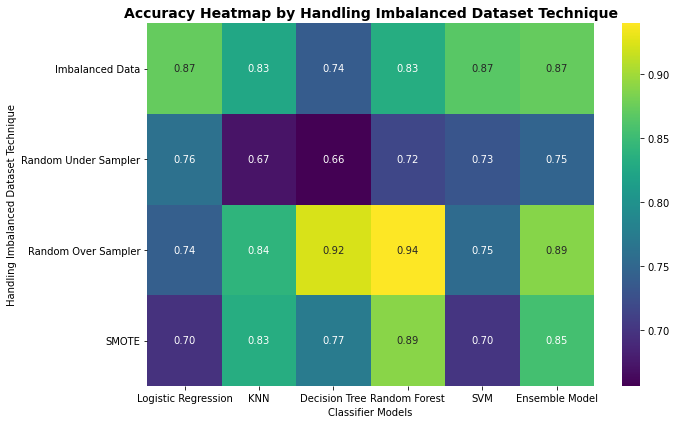

In [68]:
accuracies = {
    'Imbalanced Data': {
        'Logistic Regression': accuracy11,
        'KNN': accuracy21,
        'Decision Tree': accuracy31,
        'Random Forest': accuracy41,
        'SVM': accuracy51,
        'Ensemble Model': accuracy61
    },
    'Random Under Sampler': {
        'Logistic Regression': accuracy12,
        'KNN': accuracy22,
        'Decision Tree': accuracy32,
        'Random Forest': accuracy42,
        'SVM': accuracy52,
        'Ensemble Model': accuracy62
    },
    'Random Over Sampler': {
         'Logistic Regression': accuracy13,
        'KNN': accuracy23,
        'Decision Tree': accuracy33,
        'Random Forest': accuracy43,
        'SVM': accuracy53,
        'Ensemble Model': accuracy63
    },

    'SMOTE': {
         'Logistic Regression': accuracy14,
        'KNN': accuracy24,
        'Decision Tree': accuracy34,
        'Random Forest': accuracy44,
        'SVM': accuracy54,
        'Ensemble Model': accuracy64
    }
}

# Convert to DataFrame for easier plotting
data = pd.DataFrame(accuracies).T

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data, annot=True, cmap='viridis', cbar=True, fmt=".2f")
plt.title('Accuracy Heatmap by Handling Imbalanced Dataset Technique', fontsize=14, fontweight='bold')
plt.xlabel('Classifier Models')
plt.ylabel('Handling Imbalanced Dataset Technique')
plt.tight_layout()
plt.show()

# SMOTE + RFE

In [ ]:
from sklearn.feature_selection import RFE

# Recursive Feature Elimination
rfe = RFE(estimator=model3, n_features_to_select=8)
rfe = rfe.fit(X3, y3)

# Selected features
selected_features = X3.columns[rfe.support_]
print("Selected features by RFE:", selected_features)

X4= X3[selected_features]

X_train,X_test,y_train,y_test = train_test_split(X4,y3,test_size=0.2, random_state=0)

# Logistic Regression
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
accuracy15 = accuracy_score(y_test, y_pred)
print(f'{model1} Accuracy: {accuracy15 * 100:.2f}%')

# K-Nearest Neighbors
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
accuracy25 = accuracy_score(y_test, y_pred)
print(f'{model2} Accuracy: {accuracy25 * 100:.2f}%')

# Deision Tree
model3 = DecisionTreeClassifier()
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
accuracy35 = accuracy_score(y_test, y_pred)
print(f'{model3} Accuracy: {accuracy35 * 100:.2f}%')

# Random Forest
model4 = RandomForestClassifier()
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)
accuracy45 = accuracy_score(y_test, y_pred)
print(f'{model4} Accuracy: {accuracy45 * 100:.2f}%')

# SVM
model5 = SVC(kernel='linear')
model5.fit(X_train, y_train)
y_pred = model5.predict(X_test)
accuracy55 = accuracy_score(y_test, y_pred)
print(f'{model5} Accuracy: {accuracy55 * 100:.2f}%')

# Ensemble Model
ensemble_model = VotingClassifier(estimators=[
    ('log_reg', model1),
    ('Random Forest', model4),
    ('KNN', model2)
], voting='soft') 
ensemble_model.fit(X_train, y_train)
y_pred = ensemble_model.predict(X_test)
accuracy65 = accuracy_score(y_test, y_pred)
print(f'Ensemble Model Accuracy: {accuracy65 * 100:.2f}%')

In [ ]:
accuracies = {
    
    'SMOTE': {
         'Logistic Regression': accuracy14,
        'KNN': accuracy24,
        'Decision Tree': accuracy34,
        'Random Forest': accuracy44,
        'SVM': accuracy54,
        'Ensemble Model': accuracy64
    },
    'RFE': {
         'Logistic Regression': accuracy15,
        'KNN': accuracy25,
        'Decision Tree': accuracy35,
        'Random Forest': accuracy45,
        'SVM': accuracy55,
        'Ensemble Model': accuracy65
    }
}

# Convert to DataFrame for easier plotting
data = pd.DataFrame(accuracies).T

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data, annot=True, cmap='viridis', cbar=True, fmt=".2f")
plt.title('Accuracy Heatmap SMOTE + RFE', fontsize=14, fontweight='bold')
plt.xlabel('Classifier Models')
plt.ylabel('SMOTE + RFE')
plt.tight_layout()
plt.show()

# Random Over Sampler + RFE

In [ ]:
from sklearn.feature_selection import RFE

# Recursive Feature Elimination
rfe = RFE(estimator=model3, n_features_to_select=8)
rfe = rfe.fit(X2, y2)

# Selected features
selected_features = X2.columns[rfe.support_]
print("Selected features by RFE:", selected_features)

X5= X2[selected_features]

X_train,X_test,y_train,y_test = train_test_split(X5,y2,test_size=0.2, random_state=0)

# Logistic Regression
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
accuracy16 = accuracy_score(y_test, y_pred)
print(f'{model1} Accuracy: {accuracy16 * 100:.2f}%')

# K-Nearest Neighbors
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
accuracy26 = accuracy_score(y_test, y_pred)
print(f'{model2} Accuracy: {accuracy26 * 100:.2f}%')

# Deision Tree
model3 = DecisionTreeClassifier()
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
accuracy36 = accuracy_score(y_test, y_pred)
print(f'{model3} Accuracy: {accuracy36 * 100:.2f}%')

# Random Forest
model4 = RandomForestClassifier()
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)
accuracy46 = accuracy_score(y_test, y_pred)
print(f'{model4} Accuracy: {accuracy46 * 100:.2f}%')

# SVM
model5 = SVC(kernel='linear')
model5.fit(X_train, y_train)
y_pred = model5.predict(X_test)
accuracy56 = accuracy_score(y_test, y_pred)
print(f'{model5} Accuracy: {accuracy56 * 100:.2f}%')

# Ensemble Model
ensemble_model = VotingClassifier(estimators=[
    ('log_reg', model1),
    ('Random Forest', model4),
    ('KNN', model2)
], voting='soft') 
ensemble_model.fit(X_train, y_train)
y_pred = ensemble_model.predict(X_test)
accuracy66 = accuracy_score(y_test, y_pred)
print(f'Ensemble Model Accuracy: {accuracy66 * 100:.2f}%')

In [ ]:
accuracies = {
    'Random Over Sampler': {
         'Logistic Regression': accuracy13,
        'KNN': accuracy23,
        'Decision Tree': accuracy33,
        'Random Forest': accuracy43,
        'SVM': accuracy53,
        'Ensemble Model': accuracy63
    },

    'RFE': {
         'Logistic Regression': accuracy16,
        'KNN': accuracy26,
        'Decision Tree': accuracy36,
        'Random Forest': accuracy46,
        'SVM': accuracy56,
        'Ensemble Model': accuracy66
    }
}

# Convert to DataFrame for easier plotting
data = pd.DataFrame(accuracies).T

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data, annot=True, cmap='viridis', cbar=True, fmt=".2f")
plt.title('Accuracy Heatmap by ROS + RFE', fontsize=14, fontweight='bold')
plt.xlabel('Classifier Models')
plt.ylabel('ROS + RFE')
plt.tight_layout()
plt.show()